<img src="./pics/ajay-tech-logo.png"/> <hr>
This notebook is &copy; of Ajay Tech @ https://ajaytech.co. You can find the online version of this notebook at <a href="https://ajaytech.co/knn-r">KNN Classification in Python</a>

# Contents

- [What is Classification](#What-is-Classification)
- [How does KNN work](#How-does-KNN-work)
- [Math behind KNN](#Math-behind-KNN)
  - [Iris dataset](#Iris-dataset)
- [KNN by hand](#KNN-by-hand)
- [KNN in Python](#KNN-in-Python)
  - [Confusion Matrix](#Confusion-Matrix)
  - [Visualizing Classification Results](#Visualizing-Classification-Results)
- [KNN for Regression](#KNN-for-Regression)
- [Feature Scaling](#Feature-Scaling)
- [Effect of Outliers](#Effect-of-Outliers)
  - [What is an Outlier](#What-is-an-Outlier)
- [Parameter Tuning](#Parameter-Tuning)
- [KNN Properties](#KNN-Properties)
  - [Non Parametric](#Non-Parametric)
  - [Lazy Learning](#Lazy-Learning)
  - [Bias Variance](#Bias-Variance)
- [Handle Categorical Values in KNN](#Handle-Categorical-Values-in-KNN)
- [KNN Assumptions](#KNN-Assumptions)



## What is Classification

Imagine a city like this. It has urban areas in the middle ( downtown, mid-town ) and sub-urban areas on the outskirts.



<img src="./pics/urban_sub-urban.png"/>

Each of the dwellings ( houses, businesses ) has a GPS location.

<img src="./pics/gps_location_knn.png"/>

Given the co-ordinates of a place, can you figure out if the place is urban or sub-urban ? What a stupid question you might be asking yourself. Why would you ever need to know it ? If a dwelling is urban or sub-urban is something you can know just by looking at it. We have taken this scenario just to make things simple. You can very well imagine more complicated scenarios like terrain mapping an alien planet or mapping friendly neighborhoods vs hostile in a war zone etc. In all these cases, visual clues might not be good enough.

As with any Machine Learning algorithm, we need data points to start with. We need a bunch of data points clearly marked as urban or sub-urban so that we can train the algorithm first.



<img src="./pics/data_points_sub-urban_urban.png"/>

We list the data points in a grid like so.



<img src="./pics/data_points.png"/>

Once we have the data, our task is to train the algorithm so that any arbitrary point can now be classified as either urban or rub-urban just based on the data location. This is an example of classification.



<img src="./pics/arbitrary_data_point_knn.png"/>

We can take a similar example, but instead of classifying the result as either urban or sub-urban, we could be predicting a value - say the value of a house or a piece of real estate.



<img src="./pics/regression_knn.png"/>

Point being, we can use KNN for both classification as well as regression. Enough said, let's check out how KNN works.



## How does KNN work

Let's go back to the same urban/sub-urban problem. What we have is a list of data points - specifically GPS co-ordinates ( latitude and longitude ).



<img src="./pics/latitude_longitude.png"/>

Each of these data points have been classified properly in the training data set. Now, given a new point ( GPS location ), what our algorithm has to do is to classify it as urban or sub-urban.



<img src="./pics/urban_or_sub_urban.png"/>

How does KNN do it ? It is based on calculating the distances to the closest points. These closes points are what KNN refers to as neighbors.



For example, if we calculate the distance between the new point and all other known locations ( training data ) and sort the distance in increasing order,



<img src="./pics/knn_sorted_by_distance.png"/>

We see that the top 4 closest points are green ( sub-urban ) and the 5th closest point is yellow ( urban ). So, since the majority of the top 5 closest points is sub-urban, in all probability the new data point is sub-urban as well. Let's check out the math behind the calculation of distances.



## Math behind KNN

Here is a simple formula ( Euclidean distance ) for calculating the distance between 2 points in a 2-D space.



<img src="./pics/euclidean_distance_between_points.png"/>

By definition, you can extend the same to 3-D space as shown below.



<img src="./pics/euclidean_distance_3-d-space-knn.png"/>

Euclidean is the most popular formula to measure distance between 2 points in n-dimensional space. However, there are other types of measurement as well.



<img src="./pics/distances_euclidean_manhattan_minowski_hamming.png"/>

Once the distances are calculated, all we have to do is to sort the distances in increasing order and take the first "k" points. That is where K-NN gets its name from - "k" nearest neighbors. If the majority of these "k" nearest points belong to a particular category, you classify the new data point as belonging to that particular category.



### Iris dataset

A classic dataset that is used to teach classification is the iris dataset. Ronald Fisher, a scientist gathered the sepal and petal lengths of a species of flowers related to Iris category. The dataset comprises of 50 entries each for the 3 species
- setosa
- versicolor
- virginica

<img src="./pics/iris-setosa.jpg"/> <img src="./pics/iris-versicolor.jpg"/> <img src="./pics/iris-virginica.jpg"/>

The data has 4 features
- Sepal Length
- Sepal Width
- Petal Length
- Petal Width

and a target 

- Species of flower

<img src="./pics/petal-sepal.png"/>

Let's get the dataset first. 

In [10]:
data(iris)

Display the first few rows. 

In [11]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


Check the feature names

In [12]:
names(iris)

[1] "Sepal.Length" "Sepal.Width"  "Petal.Length" "Petal.Width"  "Species"

and the target data. 

In [14]:
iris$Species

[1] setosa     setosa     setosa     setosa     setosa     setosa    
  [7] setosa     setosa     setosa     setosa     setosa     setosa    
 [13] setosa     setosa     setosa     setosa     setosa     setosa    
 [19] setosa     setosa     setosa     setosa     setosa     setosa    
 [25] setosa     setosa     setosa     setosa     setosa     setosa    
 [31] setosa     setosa     setosa     setosa     setosa     setosa    
 [37] setosa     setosa     setosa     setosa     setosa     setosa    
 [43] setosa     setosa     setosa     setosa     setosa     setosa    
 [49] setosa     setosa     versicolor versicolor versicolor versicolor
 [55] versicolor versicolor versicolor versicolor versicolor versicolor
 [61] versicolor versicolor versicolor versicolor versicolor versicolor
 [67] versicolor versicolor versicolor versicolor versicolor versicolor
 [73] versicolor versicolor versicolor versicolor versicolor versicolor
 [79] versicolor versicolor versicolor versicolor versicolor versicolor
 [85] versicolor versicolor versicolor versicolor versicolor versicolor
 [91] versicolor versicolor versicolor versicolor versicolor versicolor
 [97] versicolor versicolor versicolor versicolor virginica  virginica 
[103] virginica  virginica  virginica  virginica  virginica  virginica 
[109] virginica  virginica  virginica  virginica  virginica  virginica 
[115] virginica  virginica  virginica  virginica  virginica  virginica 
[121] virginica  virginica  virginica  virginica  virginica  virginica 
[127] virginica  virginica  virginica  virginica  virginica  virginica 
[133] virginica  virginica  virginica  virginica  virginica  virginica 
[139] virginica  virginica  virginica  virginica  virginica  virginica 
[145] virginica  virginica  virginica  virginica  virginica  virginica 
Levels: setosa versicolor virginica

## Exploratory Data Analysis

Before we start to do understand KNN better, let's explore the data visually ( just a bit )

**Scatter Plot** - Shows visually how the target is distributed vis-a-vis the predictors. For classification problems, start looking at clusters of data in the scatter plot. More clustering means, a better chance of classification. Try it with different combination of features. 

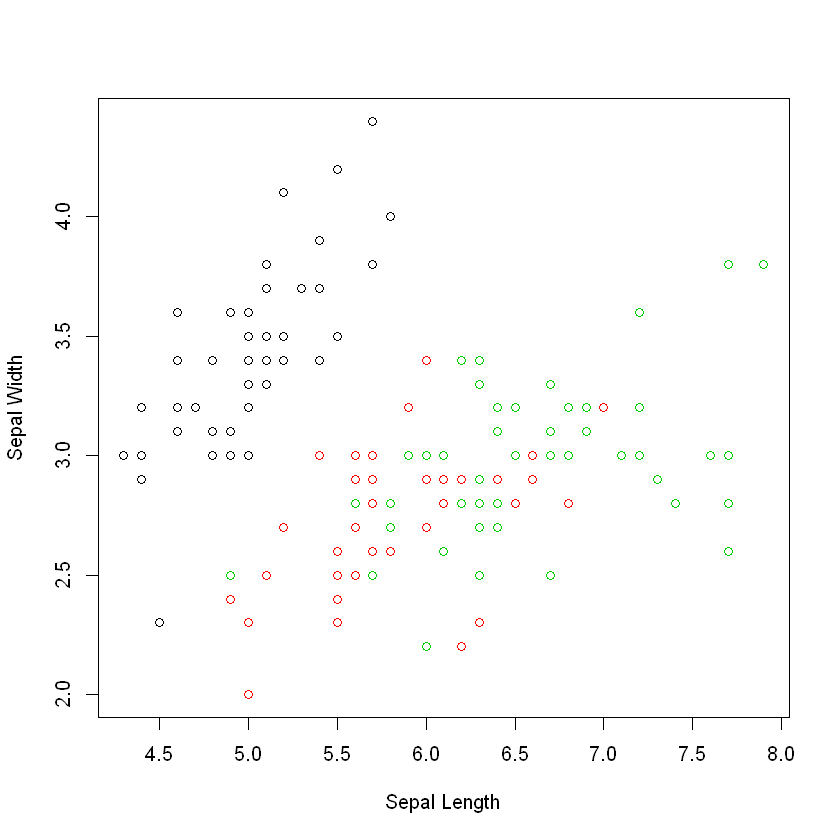

In [25]:
plot(iris$Sepal.Length, iris$Sepal.Width, 
     col=iris$Species,
     xlab = "Sepal Length",
     ylab = "Sepal Width")

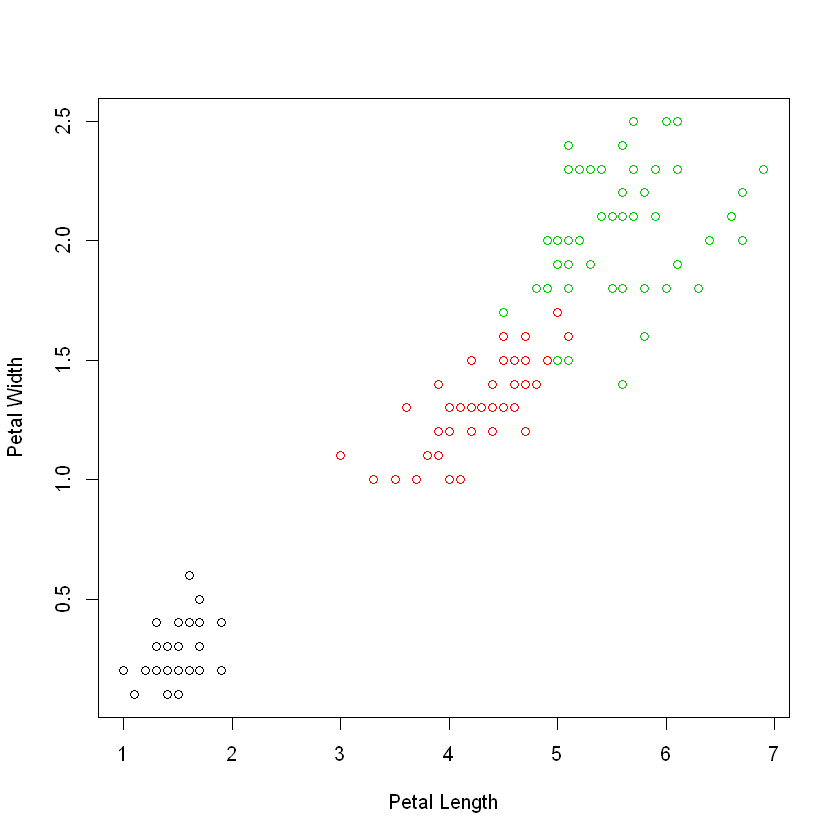

In [27]:
plot(iris$Petal.Length, iris$Petal.Width, 
     col=iris$Species,
     xlab = "Petal Length",
     ylab = "Petal Width")

There are many more plots that can give a better understanding of the data, but for now, let's get back to KNN. 

## KNN by hand

Before we do KNN in R, it is a good idea to try to do this distance calculation by hand in excel. This will give us a good idea on what is going on behind the hood. Let's do it on the iris data set as it is a good example of a categorical response variable. If you want to just understand how this is done in R, you can skip this section.

**Step 1** : Load the iris dataset from sklearn's datasets class



In [30]:
data(iris)

**Step 2** : Write out the iris file to excel



In [31]:
# write out the data as a csv
write.csv(iris, file="./data/iris_new.csv")

You can find the excel used to calculate the distances by hand using simple formulas below.  

<a href="https://ajaytech.co/wp-content/uploads/2020/02/iris_calculation.xlsx"> <img src="./pics/excel_icon.png"/> </a>

<img src="./pics/iris-file.png"/>

<img src="./pics/excel_formula_to_calculate_knn_distances.png"/>

Once you do the ranking, all you have to do is pick the top 5 or 10 ( closest ) and the species that most of these top entries belong to is the one that the test entry should belong to.



<hr>

## KNN in R

In [47]:
library(class)

# Split data to test and train
index = sample(1:nrow(iris),nrow(iris) * 0.8)
train = iris[index,]
test = iris[-index,]

knn_pred <- knn(train = train[,c(1,2,3,4)], test = test[,c(1,2,3,4)], cl= train[,5],k = 5,prob=TRUE) 


In [48]:
table(knn_pred, test[,5])

            
knn_pred     setosa versicolor virginica
  setosa         10          0         0
  versicolor      0         13         0
  virginica       0          2         5

<hr>

## Confusion Matrix

In Linear Regressin, we have seen how to check the accuracy of prediction using **r<sup>2</sup>**. That was for continous target variables. In the case of the iris dataset, the target is a categorical variable. So, **r<sup>2</sup>** does not apply here. A simple way to check the accuracy of a classification is via a confusion matrix. 

In [49]:
# Load library 'caret' for confusion matrix
library(caret)

# Confusion matrix - to get performance details of the model
cm = confusionMatrix(as.factor(knn_pred),as.factor(test[,5]))
cm

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         10          0         0
  versicolor      0         13         0
  virginica       0          2         5

Overall Statistics
                                          
               Accuracy : 0.9333          
                 95% CI : (0.7793, 0.9918)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : 4.34e-07        
                                          
                  Kappa : 0.8947          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.8667           1.0000
Specificity                 1.0000            1.0000           0.9200
Pos Pred Value              1.0000            1.0000           0.7143
Neg Pred Value              1.0000            0.8824           1.0000
P

You can get the overall accuracy from the confusion matrix (if you wish to extract it programmatically).

In [54]:
cm$overall["Accuracy"]

Accuracy 
0.9333333

<hr>

## Visualizing Classification Results

Visualizing classification results is not straight forward for the simple reason that it is not all that used. However, since we are just learning classification, it would make sense to visualize the results. Unfortunately, there are no standard plots available - so we would have to build something on our own. We do this using a concept called **Decision Boundaries**. There are 4 steps to this

- **Step 1** - Model the Classifier
- **Step 2** - Use NumPy's meshgrid to generate grid co-ordinates
- **Step 3** - Use the classifier to predict all the grid co-ordinates and plot them as a scatter plot. 
- **step 4** - Finally, scatter plot the actual data points over Step 3's scatter plot. 

**Note** - _If you are learning classification for the first time, feel free to skip to the results and don't worry about the steps_. 

**Step 1** - Model the Classifier

In [56]:
library(class)

# Split data to test and train
index = sample(1:nrow(iris),nrow(iris) * 0.8)
train = iris[index,]
test = iris[-index,]

knn_pred <- knn(train = train[,c(1,2,3,4)], test = test[,c(1,2,3,4)], cl= train[,5],k = 5,prob=TRUE) 

**Step 2** - Use NumPy's meshgrid to generate grid co-ordinates

In [57]:
x_min = iris.data[:,0].max()
x_max = iris.data[:,0].min()

y_min = iris.data[:,1].max()
y_max = iris.data[:,1].min()

In [58]:
import numpy as np

x = np.linspace(x_min,x_max,1000)
y = np.linspace(y_min,y_max,1000)

In [59]:
xx,yy = np.meshgrid(x,y)

In [69]:
grid_data =  np.column_stack((xx.reshape(-1,1),yy.reshape(-1,1)))

In [55]:
library(pracma)

meshgrid()

**Step 3** - Use the classifier to predict all the grid co-ordinates and plot them as a scatter plot. 

In [70]:
z = model_knn.predict(grid_data)

In [72]:
z = z.reshape(xx.shape)

In [73]:
z.shape

(1000, 1000)

In [64]:
z

array([[2, 2, 2, ..., 0, 0, 0],
       [2, 2, 2, ..., 0, 0, 0],
       [2, 2, 2, ..., 0, 0, 0],
       ...,
       [2, 2, 2, ..., 0, 0, 0],
       [2, 2, 2, ..., 0, 0, 0],
       [2, 2, 2, ..., 0, 0, 0]])

**step 4** - Finally, scatter plot the actual data points over Step 3's scatter plot. 

Text(0, 0.5, 'Sepal Width')

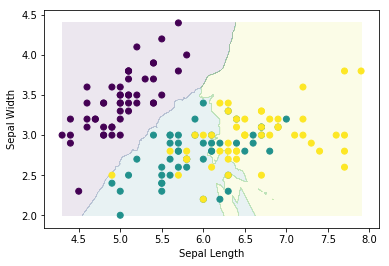

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.contourf(xx,yy,z,alpha=0.1)
plt.scatter(iris.data[:,0],iris.data[:,1],c=iris.target)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")

Eachof the colors (purple,green,yellow) represent the three different species ( "Setosa", "Versicolor", "Virginica" ). As you can see, there is some overlap between **Versicolor** and **Virginica** , while **Setosa** is a straight forward case. 

<hr>

## KNN for Regression

Although KNN is an algorithm best known for classification problems, we can very well use it for regression. In classification, we chose the majority class in the **"k"** nearest neighbors. In regression we chose the average of the **"k"** nearest neighbors.



<img src="./pics/averaging_nearest_neighbours.png"/>

Doing this in Python is just as easy. You just have to use a different function for regression. Since the response variable in iris is a categorical variable, let's use another dataset - Boston Housing that has a continuous variable for the response variable.



**Step 1 - Get the Boston Housing dataset**

In [65]:
library(mlbench)

data("BostonHousing")

boston = BostonHousing
head(boston)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


Since KNN is based on distances, factors and strings are not allowed. Let's remove *chas* variable which is a factor. 

In [70]:
boston = boston[,c(1:3,5:14)]
head(boston)

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


**Step 2 - Split the data into training and test data**

In [76]:
# Split data to test and train
index = sample(1:nrow(boston),nrow(boston) * 0.8)
train = boston[index,]
test  = boston[-index,]

**Step 3 - Model the data using FNN library's knn.reg ( ) Class**

Let's just use one predictor - say the *number of rooms*. Let's just plot it with the *median house value* to see if there is a relationship. 

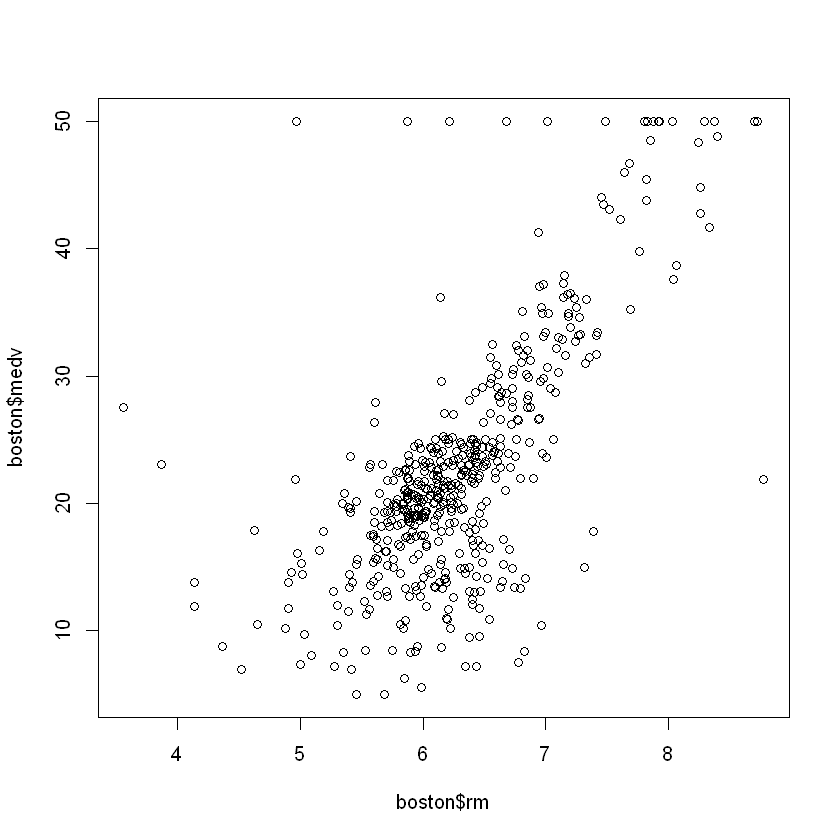

In [103]:
plot(boston$rm, boston$medv)

There seems to be a good correlation. Let's use KNN to model the relationship as a regression.

In [101]:
library(FNN)

# we will just be using one variable, to predict the median house value
knn_pred = knn.reg(train["rm"], test["rm"], train$medv, k = 5 )

In [102]:
knn_pred

Prediction:
  [1] 34.64 34.74 20.10 21.48 18.28 20.98 17.88 17.64 16.26 20.08 17.08 24.16
 [13] 20.66 18.48 20.88 20.66 20.60 19.72 21.68 21.70 25.64 20.28 16.56 25.64
 [25] 19.80 17.64 18.30 17.20 15.30 14.76 16.86 20.46 20.70 25.82 16.26 22.36
 [37] 19.96 45.14 23.82 22.02 26.80 29.84 30.36 45.26 13.58 18.88 22.84 16.62
 [49] 30.74 22.36 15.94 40.82 18.80 29.72 20.60 20.66 18.14 18.56 19.96 23.04
 [61] 22.02 26.68 48.46 20.12 34.74 29.82 34.32 18.62 18.28 16.86 20.52 17.74
 [73] 26.56 30.74 23.40 20.42 18.42 13.56 13.56 19.18 14.36 14.76 18.42 18.48
 [85] 18.52 16.58 12.64  9.66 21.48 19.68 15.80 25.16 23.34 17.38 17.04 35.52
 [97] 21.62 18.34 26.56 17.44 17.04 21.80

**Step 4 - Predict the Median House Prices based on the model**

Since KNN is a lazy model, preduction happens right at the time of modeling. There are no parameters to store. This is in contrast to other models like Linear Regression which computes a set of parameters (slope, intercept for example) based on the training data and then uses the test data to predict. 

In [104]:
knn_pred

Prediction:
  [1] 34.64 34.74 20.10 21.48 18.28 20.98 17.88 17.64 16.26 20.08 17.08 24.16
 [13] 20.66 18.48 20.88 20.66 20.60 19.72 21.68 21.70 25.64 20.28 16.56 25.64
 [25] 19.80 17.64 18.30 17.20 15.30 14.76 16.86 20.46 20.70 25.82 16.26 22.36
 [37] 19.96 45.14 23.82 22.02 26.80 29.84 30.36 45.26 13.58 18.88 22.84 16.62
 [49] 30.74 22.36 15.94 40.82 18.80 29.72 20.60 20.66 18.14 18.56 19.96 23.04
 [61] 22.02 26.68 48.46 20.12 34.74 29.82 34.32 18.62 18.28 16.86 20.52 17.74
 [73] 26.56 30.74 23.40 20.42 18.42 13.56 13.56 19.18 14.36 14.76 18.42 18.48
 [85] 18.52 16.58 12.64  9.66 21.48 19.68 15.80 25.16 23.34 17.38 17.04 35.52
 [97] 21.62 18.34 26.56 17.44 17.04 21.80

**Step 5 - Check the accuracy of prediction**

In [137]:
# Root Mean Square Error - RMSE
rmse = function(actual, predicted) {
  sqrt(mean((actual - predicted) ^ 2))
}

#Residual Sum of Squares - RSS
rss = function (actual, predicted) {
    sum((actual - predicted) ^ 2)
}

# Total Sum of Squares - TSS
tss = function(actual, predicted) {
    sum((actual - mean(actual)) ^ 2)
}

rmse      = rmse( test$medv, knn_pred$pred )
rss       = rss (test$medv, knn_pred$pred)
tss       = tss (test$medv, knn$pred)
r_square  = 1 - rss/tss 

cat("r_square = ", r_square)

r_square =  0.3776218

That's a pretty low value. If you want to check the prediction visually, you can use a scatter plot. The more scattered the points are from the 45<sup>0</sup> line, the more in accurate it is. 

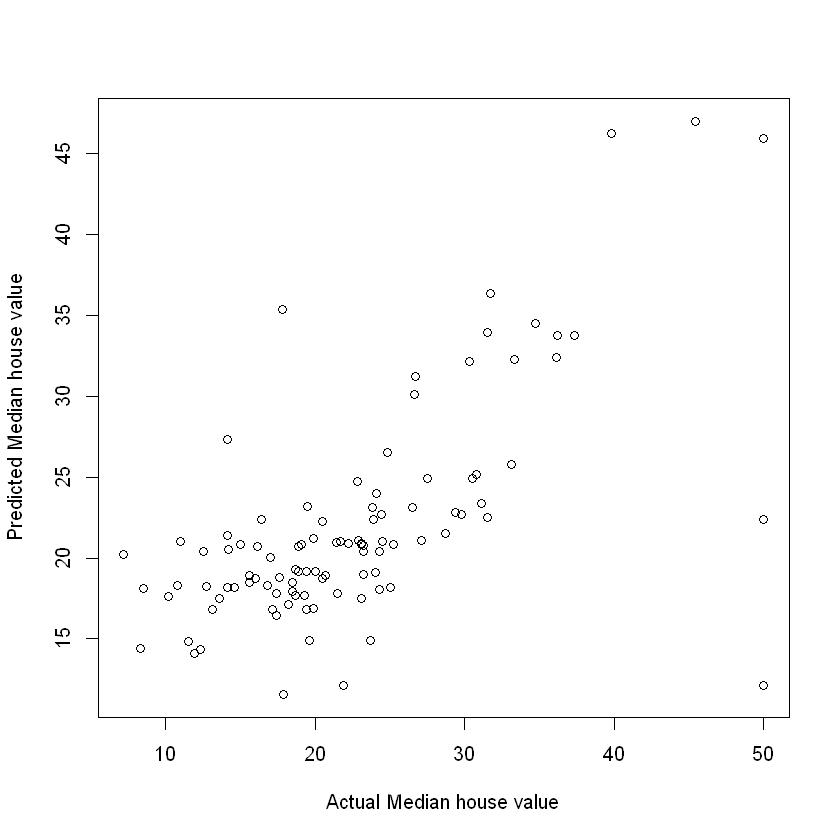

In [129]:
plot(test$medv,knn_pred$pred,
     xlab = "Actual Median house value",
     ylab = "Predicted Median house value")

We have used all the predictors in the Boston Housing data to predict the house value. We haven't used feature selection at all. That is a bad idea and thats why you get such a bad R<sup>2</sup> score. But that's ok for now . We just want do see that,

> KNN can do **Regression** as well.

and not just **Classification**.

<hr>

## Feature Scaling

Feature scaling is always an important parameter in most machine learning algorithms - and so it is with KNN as well. We can very well illustrate this with the iris dataset.



In [140]:
head(iris[,c(1,2,3,4)])

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
,<dbl>,<dbl>,<dbl>,<dbl>
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
6,5.4,3.9,1.7,0.4


If you look at the iris dataset, all the lengths ( sepal, petal ) are in centimeter. Say, we convert one of the predictors ( say Sepal Length - the first column ) to millimeters ( mm ). How would it affect the accuracy ?



In [148]:
iris_unscaled = iris
iris_unscaled[,1] = iris_unscaled[,1] * 10

head(iris_unscaled)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,51,3.5,1.4,0.2,setosa
2,49,3.0,1.4,0.2,setosa
3,47,3.2,1.3,0.2,setosa
4,46,3.1,1.5,0.2,setosa
5,50,3.6,1.4,0.2,setosa
6,54,3.9,1.7,0.4,setosa


Let's fit the model again and see if the accuracy of prediction is affected this time with unscaled data. 

In [163]:
knn_pred_unscaled = knn(train = iris[,c(1,2,3,4)], test = iris[,c(1,2,3,4)], cl= iris[,5],k = 5,prob=TRUE) 
knn_pred_scaled   = knn(train = iris_unscaled[,c(1,2,3,4)], test = iris_unscaled[,c(1,2,3,4)], cl= iris_unscaled[,5],k = 5,prob=TRUE) 

In [164]:
cm_unscaled = confusionMatrix(as.factor(knn_pred_unscaled),as.factor(iris[,5]))
cm_scaled   = confusionMatrix(as.factor(knn_pred_scaled)  ,as.factor(iris[,5]))

# cm$overall["Accuracy"]
cat(cm_unscaled$overall["Accuracy"], cm_scaled$overall["Accuracy"])

0.9666667 0.9266667

<table>
<tr> <td><b>Model</b> </td> <td><b> Score</b> </td> </tr>
<tr> <td><b>Scaled Model</b> </td> <td> 0.96 </td> </tr>
<tr> <td><b>Un-scaled Model</b> </td> <td> 0.92 </td> </tr>

</table>

It is too small a dataset to really predict if there has been a difference due to the wrong scaling of the features, but nevertheless it will give you an idea on how the accuracy can differ due to feature scaling.



> Since KNN is based on distances between data points, always make sure that the data is scaled properly. 


**Quiz**

**Question** - Does changing the scale from mm ( x 10 ) to micro meter ( x 100 ) of the first column ( Sepal Length ) affect the score further ? 

- True
- False

<hr>

## Effect of Outliers

Just like most ML algorithms, outliers affect the fit of the data greatly - and so is it with KNN. One good plot to detect outliers is the box and whisker plot. 

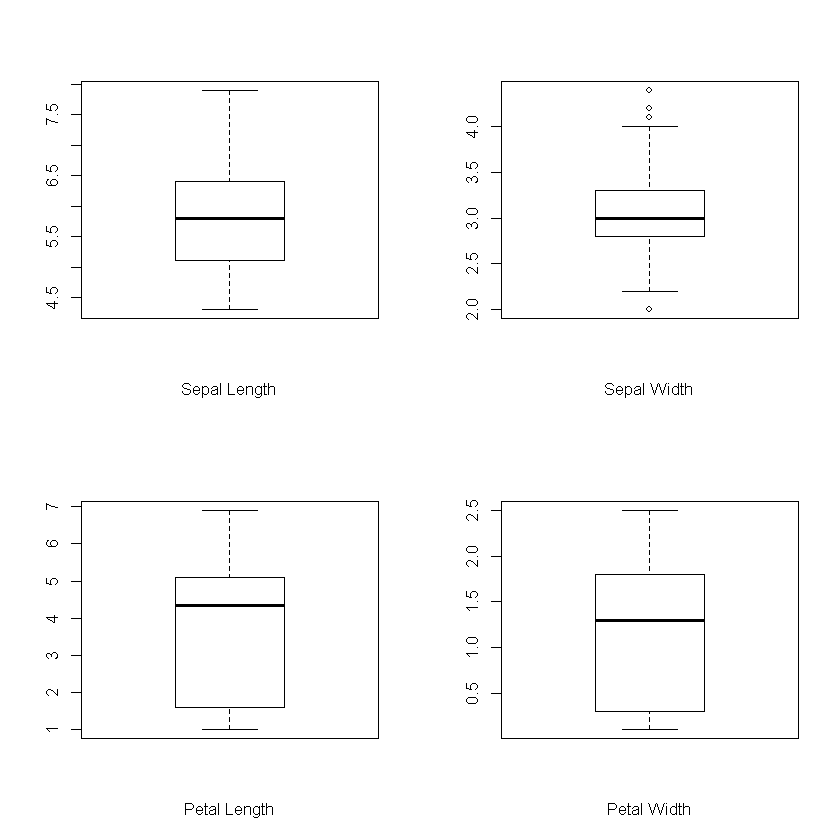

In [170]:
par(mfrow=c(2,  # number of rows
            2)) # number of columns 
boxplot(iris[,1], xlab = "Sepal Length")
boxplot(iris[,2], xlab = "Sepal Width")
boxplot(iris[,3], xlab = "Petal Length")
boxplot(iris[,4], xlab = "Petal Width")

Let's inject some outliers into the iris dataset and see if the results are affected.

In [202]:
iris_outliers = iris

In [203]:
iris_outliers[c(1,20,40,60,80,100,120,140),c(1,2,3,4)] = iris_outliers[c(1,20,40,60,80,100,120,140),c(1,2,3,4)] * 50000

In [204]:
iris_outliers[c(1,20,40,60,80,100,120,140),c(1,2,3,4)]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
,<dbl>,<dbl>,<dbl>,<dbl>
1,255000,175000,70000,10000
20,255000,190000,75000,15000
40,255000,170000,75000,10000
60,260000,135000,195000,70000
80,285000,130000,175000,50000
100,285000,140000,205000,65000
120,300000,110000,250000,75000
140,345000,155000,270000,105000


In [205]:
knn_pred            = knn(train = iris[,c(1,2,3,4)], test = iris[,c(1,2,3,4)], cl= iris[,5],k = 5,prob=TRUE) 
knn_pred_outliers   = knn(train = iris_outliers[,c(1,2,3,4)], test = iris_outliers[,c(1,2,3,4)], cl= iris_outliers[,5],k = 5,prob=TRUE) 

In [206]:
cm            = confusionMatrix(as.factor(knn_pred)           , as.factor(iris[,5]))
cm_outliers   = confusionMatrix(as.factor(knn_pred_outliers)  , as.factor(iris[,5]))

# cm$overall["Accuracy"]
cat(cm$overall["Accuracy"], cm_outliers$overall["Accuracy"])

0.9666667 0.96

<hr>

## Parameter Tuning

What is the ideal value of **k** (**N** **N**) in K Nearest neighbors ? Should it be 3 or 10 or 15 ?

<pre>
knn_pred = knn(train = iris[,c(1,2,3,4)], test = iris[,c(1,2,3,4)], cl= iris[,5],**k = 5**,prob=TRUE) 
</pre>

We don't have to just pick an arbitrary "k" value - We can do cross validation for different K values and pick the right one. Make sure you have the caret package installed.



In [213]:
score = list()

for (i in 1:50) {
    knn_pred = knn(train = iris[,c(1,2,3,4)], test = iris[,c(1,2,3,4)], cl= iris[,5],k = i,prob=TRUE)
    cm       = confusionMatrix(as.factor(knn_pred), as.factor(iris[,5]))
    score[[i]] =  cm$overall["Accuracy"]
}

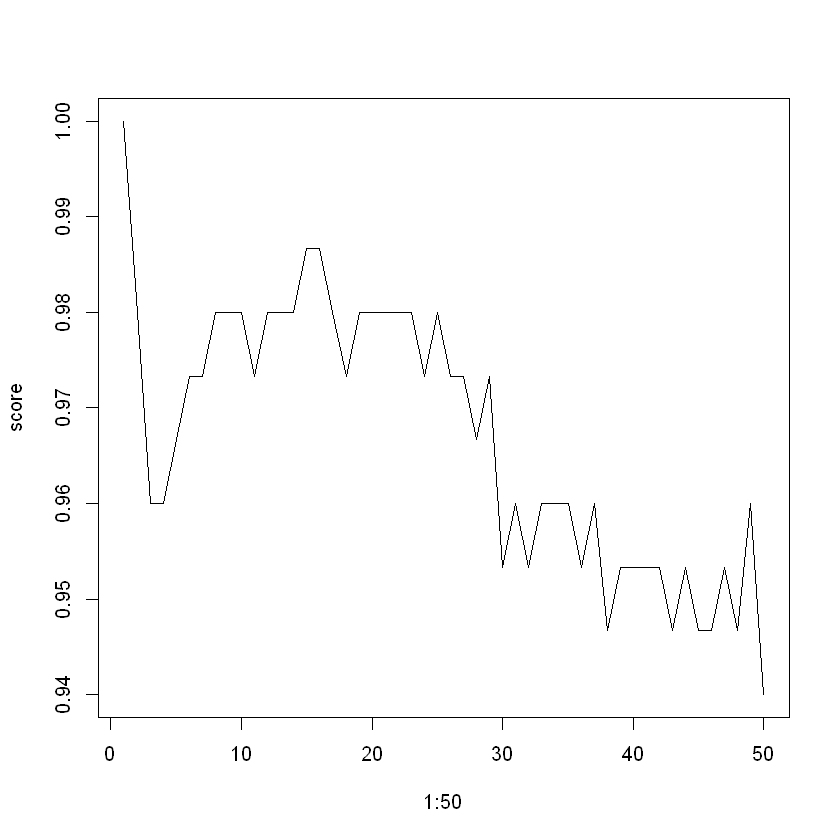

In [216]:
plot(1:50, score, type="l")

As you can see, the accuracy increases temporarily with K and after that decreases. For the iris dataset, the accuracy peaks at K values between (8 and 15).

<hr>

## KNN is Non Parametric

KNN is a non-parametric algorithm - For example, compare KNN with linear regression or Naive Bayes which are parametric.



<img src="./pics/no-parameters-in-knn.png"/>

So, with KNN, there are
- No parameters to learn
- No assumptions about the underlying data model

> In KNN, the **Data is the model** 

<hr>

## KNN is a lazy learning Algorithm

There is _no learning_ in KNN. All the predictions happen at _run-time_ without any prior work - In other words, no prior modeling is required.



<img src="./pics/knn-lazy-learning.png"/>

<hr>

## KNN - Bias - variance


Bias variance in KNN is dependent on the only hyper parameter - **k**. As __K__ increases the bias increases and variance decreases ( and vice-versa ).



<img src="./pics/knn-bias-variance.png"/>

<hr>

## How to handle Categorical data in KNN

Can KNN handle categorical data ? yes, theoretically it can by using the standard techniques to categorical data to numeric data. You can use any of the following methods to handle categorical data in KNN.



- One hot encoding
- Combine levels
- String as factors

<hr>

## KNN Data Assumptions


Does KNN need data in a particular way ? Most models have some kind of restrictions on how the data should be - For example,

- Naive Bayes assumes that the predictors are independent.
- Linear Regression has many assumptions - like multi-variate normality, multi-collinearity etc.

The beauty of KNN is that there are no data assumptions at all. The data doesn't have to distributed a certain way, nor are correlations among predictors an issue.

> KNN does not have any assumptions on the underlying data